<a href="https://colab.research.google.com/github/Gonzales-Franz-Reinaldo/SIS420-AI/blob/main/Laboratorios/LAB-01/LAB_01_SIS420.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LAB-04 SIS-420 REGULARIZACIÓN DE REGRESIÓN


Con el dataset de regresion y clasificación que utilizo en los anteriores laboratorios, repetir los mismo utilizando regularización y sin utilizar regularización, y presentar los resultados de ambas experiencias, identificando cuales son los mejores hiperparametros en ambos casos, si corresponde.

Subir todos los codigo a ecampus, copiar la direccion de sus repositorios y elaborar un informe del trabajo.

# **PREPARACIÓN DEL DATASET **


In [2]:
#Importamos las librerias para el procesamiento de datos
import numpy as np
import os
from matplotlib import pyplot as plt
import pandas as pd
import shutil as sh
from sklearn.model_selection import train_test_split


#importando libreria pandas alias pd
import pandas as pd
#labelEncoder sirve para convertir datos categoricos a numericos para poder hacer mejores calculos
from sklearn.preprocessing import LabelEncoder
#datatime sirve para poder trabajar con fechas
from datetime import datetime

In [3]:
#Importamos el dataset
data = pd.read_csv('./database_15min.csv', delimiter=',')

In [4]:
# Configurar Pandas para que no corte la visualización
pd.set_option('display.max_rows', 30)  # Mostrar todas las filas (60 -> None)
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas (20 -> None)

In [5]:
#mostramos el dataset
data

,date,open_price,maximim_value,minimum_value,close_price,volume,financial,negotiations,mme13,mme72,high_mean,low_mean,diffMACD,deaMACD,MACDlh,difflh,dealh,target
0,21-11-19 09:03,4206.0,4206.5,4204.5,4206.0,5024,211292030.0,1443,4201.6,4202.4,4202.8,4201.2,-0.637,-0.126,-0.125,-0.440,-0.377,4200.0
1,21-11-19 09:04,4206.5,4206.5,4205.0,4205.5,4451,187200190.0,1175,4202.1,4202.5,4202.9,4201.3,-0.304,-0.136,0.459,-0.090,-0.320,4201.0
2,21-11-19 09:05,4205.5,4206.5,4203.0,4204.5,6515,273933345.0,1627,4202.5,4202.5,4203.1,4201.4,-0.099,-0.134,0.679,0.105,-0.235,4199.0
3,21-11-19 09:06,4204.5,4204.5,4203.0,4203.5,2751,115640535.0,801,4202.6,4202.5,4203.1,4201.4,-0.005,-0.127,0.658,0.176,-0.153,4201.0
4,21-11-19 09:07,4203.0,4204.0,4202.0,4202.5,3360,141218695.0,1038,4202.6,4202.5,4203.1,4201.4,-0.007,-0.120,0.486,0.151,-0.092,4207.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33073,31-03-20 12:45,5197.0,5197.5,5196.5,5197.0,63,3274000.0,24,5196.3,5196.3,5196.8,5195.7,-0.120,-0.811,0.189,0.334,0.240,5197.5
33074,31-03-20 12:46,5196.5,5197.5,5196.0,5197.5,76,3949415.0,27,5196.5,5196.4,5196.9,5195.7,-0.010,-0.765,0.254,0.398,0.271,5197.0
33075,31-03-20 12:47,5197.5,5198.0,5197.0,5198.0,108,5613470.0,43,5196.7,5196.4,5197.0,5195.8,0.127,-0.714,0.340,0.484,0.314,5198.0
33076,31-03-20 12:48,5197.5,5198.0,5197.0,5197.5,84,4365980.0,28,5196.8,5196.4,5197.1,5195.9,0.204,-0.662,0.307,0.506,0.352,5197.0


In [6]:
#Leemos el tipo de datos que tiene el dataset y vemos los datos faltantes que podrian tener las columnas X
print('INFORMACION DE TIPO DE DATOS')
data.info()
print('\nDATOS VACIOS')
print(pd.isnull(data).sum())

INFORMACION DE TIPO DE DATOS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33078 entries, 0 to 33077
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           33078 non-null  object 
 1   open_price     33078 non-null  float64
 2   maximim_value  33078 non-null  float64
 3   minimum_value  33078 non-null  float64
 4   close_price    33078 non-null  float64
 5   volume         33078 non-null  int64  
 6   financial      33078 non-null  float64
 7   negotiations   33078 non-null  int64  
 8   mme13          33078 non-null  float64
 9   mme72          33078 non-null  float64
 10  high_mean      33078 non-null  float64
 11  low_mean       33078 non-null  float64
 12  diffMACD       33078 non-null  float64
 13  deaMACD        33078 non-null  float64
 14  MACDlh         33078 non-null  float64
 15  difflh         33078 non-null  float64
 16  dealh          33078 non-null  float64
 17  target         33078 

# PROCESAMIENTO DE DATOS

In [7]:
#Movimiento de columna al final del dataset y verificacion de datos
# En este caso movemos nuestra Y predicha al final de las columnas que en este caso es "4206.0.1"
indice_columna = data.columns.get_loc('close_price')
columnas = list(data.columns)
columnas.pop(indice_columna)
columnas.append('close_price')
data = data[columnas]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33078 entries, 0 to 33077
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           33078 non-null  object 
 1   open_price     33078 non-null  float64
 2   maximim_value  33078 non-null  float64
 3   minimum_value  33078 non-null  float64
 4   volume         33078 non-null  int64  
 5   financial      33078 non-null  float64
 6   negotiations   33078 non-null  int64  
 7   mme13          33078 non-null  float64
 8   mme72          33078 non-null  float64
 9   high_mean      33078 non-null  float64
 10  low_mean       33078 non-null  float64
 11  diffMACD       33078 non-null  float64
 12  deaMACD        33078 non-null  float64
 13  MACDlh         33078 non-null  float64
 14  difflh         33078 non-null  float64
 15  dealh          33078 non-null  float64
 16  target         33078 non-null  float64
 17  close_price    33078 non-null  float64
dtypes: flo

In [8]:
#variables categoricas, donde convertimos a int64
columnas_categoricas = data.select_dtypes(include=['object']).columns
#variables fechas
columnas_fechas = data.select_dtypes(include=['datetime64']).columns

In [9]:
#Procesamiento de frases o palabras a valores numericos para su procesamiento
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [10]:
# Mostramos los resultados del Dataset
# print(data)
data

,date,open_price,maximim_value,minimum_value,volume,financial,negotiations,mme13,mme72,high_mean,low_mean,diffMACD,deaMACD,MACDlh,difflh,dealh,target,close_price
0,20879,4206.0,4206.5,4204.5,5024,211292030.0,1443,4201.6,4202.4,4202.8,4201.2,-0.637,-0.126,-0.125,-0.440,-0.377,4200.0,4206.0
1,20880,4206.5,4206.5,4205.0,4451,187200190.0,1175,4202.1,4202.5,4202.9,4201.3,-0.304,-0.136,0.459,-0.090,-0.320,4201.0,4205.5
2,20881,4205.5,4206.5,4203.0,6515,273933345.0,1627,4202.5,4202.5,4203.1,4201.4,-0.099,-0.134,0.679,0.105,-0.235,4199.0,4204.5
3,20882,4204.5,4204.5,4203.0,2751,115640535.0,801,4202.6,4202.5,4203.1,4201.4,-0.005,-0.127,0.658,0.176,-0.153,4201.0,4203.5
4,20883,4203.0,4204.0,4202.0,3360,141218695.0,1038,4202.6,4202.5,4203.1,4201.4,-0.007,-0.120,0.486,0.151,-0.092,4207.0,4202.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33073,33066,5197.0,5197.5,5196.5,63,3274000.0,24,5196.3,5196.3,5196.8,5195.7,-0.120,-0.811,0.189,0.334,0.240,5197.5,5197.0
33074,33067,5196.5,5197.5,5196.0,76,3949415.0,27,5196.5,5196.4,5196.9,5195.7,-0.010,-0.765,0.254,0.398,0.271,5197.0,5197.5
33075,33068,5197.5,5198.0,5197.0,108,5613470.0,43,5196.7,5196.4,5197.0,5195.8,0.127,-0.714,0.340,0.484,0.314,5198.0,5198.0
33076,33069,5197.5,5198.0,5197.0,84,4365980.0,28,5196.8,5196.4,5197.1,5195.9,0.204,-0.662,0.307,0.506,0.352,5197.0,5197.5


In [11]:
# Convertimos a int64 a todos los valores de X
data = data.astype('int64', errors='ignore')

In [12]:
#Verificamos todos los datos del Dataset
print("INFORMACION")
print(data)
print("\nTIPOS DE DATOS")
data.info()
print("\nDATOS VACIOS")
print(pd.isnull(data).sum())

INFORMACION
        date  open_price  maximim_value  minimum_value  volume  financial  \
0      20879        4206           4206           4204    5024  211292030   
1      20880        4206           4206           4205    4451  187200190   
2      20881        4205           4206           4203    6515  273933345   
3      20882        4204           4204           4203    2751  115640535   
4      20883        4203           4204           4202    3360  141218695   
...      ...         ...            ...            ...     ...        ...   
33073  33066        5197           5197           5196      63    3274000   
33074  33067        5196           5197           5196      76    3949415   
33075  33068        5197           5198           5197     108    5613470   
33076  33069        5197           5198           5197      84    4365980   
33077  33070        5197           5197           5196     129    6704035   

       negotiations  mme13  mme72  high_mean  low_mean  diffMAC

In [19]:
# Por ultimo exportamos el dataset procesado ya sea para manejarlo de manera mas factible
#Exportamos el dataset procesado ya sea para manejarlo de manera mas factible
data.to_csv('../LAB-04/database_15min_procesado.csv', index=False)

# Regresión Multivariable 
## Aplicando Regularización y sin Regularización

In [21]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

#Para separa el Dataset 20% y 80% para diferentes pruebas
from sklearn.model_selection import train_test_split

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

# **2 Regresión lineal con multiples variables**

Se implementa la regresión lineal multivariable para predecir el precio de las acciones de la moneda dólar en IBOVESPA.

Toda la información recopilada aquí proviene de un gráfico estándar para los precios de las acciones.

Los datos están organizados por precios e información por minuto. Tiene un conjunto de datos para predecir precios e información por minuto.

Sus columnas son: date, open price, maximim value, minimum value, close price, volume, financial, negotiations, mme13, mme72, high mean, low mean ,diffMACD, deaMACD, MACDlh, difflh, dealh, target.

Donde se debe predecir precios e información por minuto en dólares. La Y predicha es "Close_price" que predecimos el precio en minutos.

# **2.1 Normalización de caracteristicas**

In [96]:
#Importamos el dataset
df = pd.read_csv('./database_15min_procesado.csv', delimiter=',')

# Mostramos los datos
df

,date,open_price,maximim_value,minimum_value,volume,financial,negotiations,mme13,mme72,high_mean,low_mean,diffMACD,deaMACD,MACDlh,difflh,dealh,target,close_price
0,20879,4206,4206,4204,5024,211292030,1443,4201,4202,4202,4201,0,0,0,0,0,4200,4206
1,20880,4206,4206,4205,4451,187200190,1175,4202,4202,4202,4201,0,0,0,0,0,4201,4205
2,20881,4205,4206,4203,6515,273933345,1627,4202,4202,4203,4201,0,0,0,0,0,4199,4204
3,20882,4204,4204,4203,2751,115640535,801,4202,4202,4203,4201,0,0,0,0,0,4201,4203
4,20883,4203,4204,4202,3360,141218695,1038,4202,4202,4203,4201,0,0,0,0,0,4207,4202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33073,33066,5197,5197,5196,63,3274000,24,5196,5196,5196,5195,0,0,0,0,0,5197,5197
33074,33067,5196,5197,5196,76,3949415,27,5196,5196,5196,5195,0,0,0,0,0,5197,5197
33075,33068,5197,5198,5197,108,5613470,43,5196,5196,5197,5195,0,0,0,0,0,5198,5198
33076,33069,5197,5198,5197,84,4365980,28,5196,5196,5197,5195,0,0,0,0,0,5197,5197


In [97]:
# Dividimos el dataset tanto para el entrenamiento de 80% y la parte de prueba de 20%
train_data, test_data = train_test_split(df, test_size = 0.2, random_state = 42)

# Dividimos los datos para X_test y y_test donde seran los datos para el prueba
X_test = test_data.iloc[:, :17]
y_test = test_data.iloc[:, 17]

# Dividimos los datos para X_train y y_train donde seran los datos para el entrenamiento
X_train = train_data.iloc[:, :17]
y_train = train_data.iloc[:, 17]
m = y_train.size


# Mostramos los datos que seran para el entrenamiento
print("Datos de X_train:")
print(X_train)
print('-' * 100)
print("Datos de y_train:")
print(y_train)

# Mostramos la cantidad de ejemplos que tienen X_train y y_train
print('-' * 80)
print("El 80% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(train_data)))
print("El 20% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(test_data)))

Datos de X_train:
        date  open_price  maximim_value  minimum_value  volume  financial  \
1056   22487        4193           4193           4192     991   41552765   
20653  20707        4384           4385           4384     724   31747635   
10781  27282        4218           4219           4218    1545   65180725   
5572   10837        4144           4144           4144    3196  132459620   
12376  31246        4247           4247           4244    2975  126289240   
...      ...         ...            ...            ...     ...        ...   
16850   9605        4347           4348           4347    1164   50608845   
6265   12604        4137           4137           4137     867   35876655   
11284  29424        4205           4206           4202    4200  176551900   
860    22291        4186           4186           4186     402   16829105   
15795   7485        4322           4322           4321     813   35136245   

       negotiations  mme13  mme72  high_mean  low_mean  d

In [36]:
# Mostramos los datos de entrenamiento X_train
X_train

,date,open_price,maximim_value,minimum_value,volume,financial,negotiations,mme13,mme72,high_mean,low_mean,diffMACD,deaMACD,MACDlh,difflh,dealh,target
1056,22487,4193,4193,4192,991,41552765,192,4193,4193,4193,4192,0,0,0,0,0,4198
20653,20707,4384,4385,4384,724,31747635,115,4385,4383,4386,4385,0,0,0,0,0,4386
10781,27282,4218,4219,4218,1545,65180725,382,4218,4212,4219,4217,5,7,0,0,0,4214
5572,10837,4144,4144,4144,3196,132459620,809,4142,4139,4143,4142,2,1,0,1,1,4144
12376,31246,4247,4247,4244,2975,126289240,813,4244,4233,4246,4243,0,0,-1,3,3,4240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,9605,4347,4348,4347,1164,50608845,249,4347,4345,4347,4346,1,1,0,0,0,4349
6265,12604,4137,4137,4137,867,35876655,129,4136,4133,4137,4136,2,2,0,1,1,4151
11284,29424,4205,4206,4202,4200,176551900,1215,4204,4205,4204,4202,-2,3,0,0,0,4189
860,22291,4186,4186,4186,402,16829105,125,4187,4186,4188,4187,0,0,0,0,0,4185


Nomalizamos los valores de X aplicando la formula de Normalización para cada Xi, Desviación estandar y promedio de las caracteristicas

In [99]:
# Normalizamos los features X
def featureNormalize(X):
  X_norm = X.copy()
  mu = np.zeros(X.shape[1]) # X.shape[1] = 17 columnas de 0 para el promedio
  sigma = np.zeros(X.shape[1]) # columnas de 0 para desviación estandar

  mu = np.mean(X, axis = 0) # calculamos el promedio de las caracteristicas, la media
  sigma = np.std(X, axis = 0) #std calcular la desviacion estandar
  X_norm = (X - mu) / sigma

  return X_norm, mu, sigma

In [24]:
# Llamamos a la funcion featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X_train)

# Mostramos los datos normalizados
X_norm

,date,open_price,maximim_value,minimum_value,volume,financial,negotiations,mme13,mme72,high_mean,low_mean,diffMACD,deaMACD,MACDlh,difflh,dealh,target
1056,0.620622,-0.795285,-0.796761,-0.796164,-0.685995,-0.706682,-0.766434,-0.794508,-0.793313,-0.796689,-0.795120,0.113918,-0.079524,0.012137,-0.040819,-0.056893,-0.781059
20653,0.434262,-0.227318,-0.227180,-0.223766,-0.784228,-0.785675,-0.850059,-0.223253,-0.226645,-0.223724,-0.219581,0.113918,-0.079524,0.012137,-0.040819,-0.056893,-0.222561
10781,1.122641,-0.720944,-0.719630,-0.718651,-0.482169,-0.516331,-0.560088,-0.720125,-0.736646,-0.719502,-0.720568,1.385432,1.985303,0.012137,-0.040819,-0.056893,-0.733527
5572,-0.599091,-0.940994,-0.942123,-0.939263,0.125261,0.025682,-0.096353,-0.946247,-0.954366,-0.945125,-0.944223,0.622524,0.215452,0.012137,0.507203,0.526862,-0.941478
12376,1.537658,-0.634708,-0.636566,-0.641139,0.043952,-0.024028,-0.092009,-0.642768,-0.674014,-0.639346,-0.643035,0.113918,-0.079524,-0.916134,1.603248,1.694371,-0.656288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,-0.728077,-0.337343,-0.336943,-0.334072,-0.622345,-0.633725,-0.704531,-0.336314,-0.339978,-0.339504,-0.335882,0.368221,0.215452,0.012137,-0.040819,-0.056893,-0.332478
6265,-0.414093,-0.961809,-0.962889,-0.960132,-0.731616,-0.752410,-0.834854,-0.964099,-0.972261,-0.962938,-0.962116,0.622524,0.510427,0.012137,0.507203,0.526862,-0.920683
11284,1.346901,-0.759601,-0.758195,-0.766351,0.494650,0.380899,0.344576,-0.761779,-0.757524,-0.764033,-0.765299,-0.394687,0.805402,0.012137,-0.040819,-0.056893,-0.807795
860,0.600101,-0.816100,-0.817527,-0.814051,-0.902698,-0.905861,-0.839198,-0.812359,-0.814190,-0.811532,-0.810030,0.113918,-0.079524,0.012137,-0.040819,-0.056893,-0.819678


In [25]:
# Mostramos resultados de los datos de media y desviación estandar

print("Media de los datos:")
print(mu)
print('-' * 100)
print("Desviación estandar de los datos:")
print(sigma)

Media de los datos:
date             1.655918e+04
open_price       4.460444e+03
maximim_value    4.461580e+03
minimum_value    4.459058e+03
volume           2.855539e+03
financial        1.292718e+08
negotiations     8.977204e+02
mme13            4.460036e+03
mme72            4.458992e+03
high_mean        4.461360e+03
low_mean         4.458634e+03
diffMACD        -4.479631e-01
deaMACD          2.695941e-01
MACDlh          -1.307535e-02
difflh           7.448417e-02
dealh            9.746051e-02
target           4.460918e+03
dtype: float64
----------------------------------------------------------------------------------------------------
Desviación estandar de los datos:
date             9.551425e+03
open_price       3.362873e+02
maximim_value    3.370900e+02
minimum_value    3.354312e+02
volume           2.718007e+03
financial        1.241279e+08
negotiations     9.207839e+02
mme13            3.361026e+02
mme72            3.352930e+02
high_mean        3.368444e+02
low_mean         3.3

Despues de terminar la featureNormalize la funcion es aplicada los valores normalizados se cargan a X_norm

In [26]:
#Realizamos una gráfica de los datos
def graficarDatos(x, y, xlabel, ylabel):
  fig = plt.figure()
  plt.plot(x, y, 'ro')
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

In [27]:
X_norm.shape

(26462, 17)

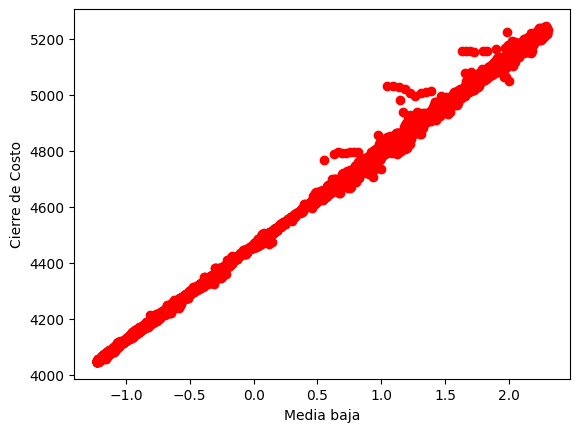

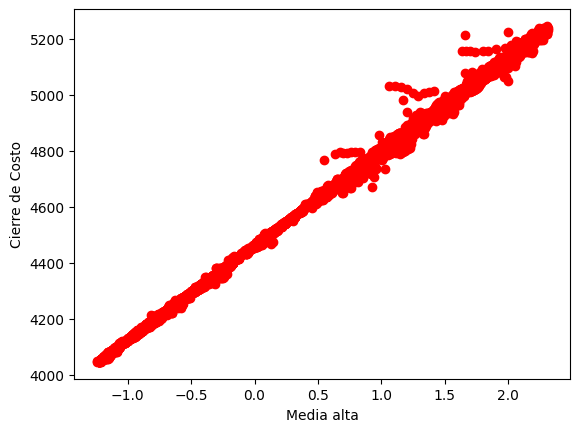

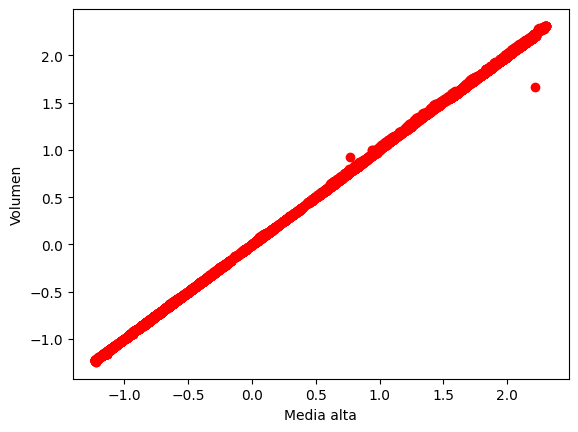

In [28]:
#Llamamos a la funcion de gráfica 10,9,10
xlabel1 = 'Media baja'
xlabel2 = 'Media alta'
ylabel1 = 'Cierre de Costo'
ylabel2 = "Volumen"

graficarDatos(X_norm.iloc[:, 10], y_train, xlabel1, ylabel1)
graficarDatos(X_norm.iloc[:, 9], y_train, xlabel2, ylabel1)
graficarDatos(X_norm.iloc[:, 10], X_norm.iloc[:, 9], xlabel2, ylabel2)

# 2.2 Descenso por el **Gradiente**

## Aplicamos y calculamos la Función de Costo

In [33]:
# Añadimos el termino de intersección, agregamos la columna de unos para los tethas 0
# Columna de 1 para X0

X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

#mostramos el resultado de X concatenado con X
X_ready[:10]

array([[ 1.        ,  0.62062188, -0.79528479, -0.79676078, -0.79616352,
        -0.68599471, -0.70668244, -0.76643432, -0.79450752, -0.7933131 ,
        -0.79668874, -0.79512003,  0.11391825, -0.07952358,  0.01213748,
        -0.04081899, -0.05689303, -0.78105884],
       [ 1.        ,  0.43426225, -0.22731799, -0.22718001, -0.22376604,
        -0.78422844, -0.7856746 , -0.85005872, -0.2232534 , -0.22664462,
        -0.22372397, -0.21958092,  0.11391825, -0.07952358,  0.01213748,
        -0.04081899, -0.05689303, -0.22256087],
       [ 1.        ,  1.12264123, -0.72094359, -0.71963005, -0.71865136,
        -0.48216891, -0.51633069, -0.5600884 , -0.72012547, -0.73664625,
        -0.71950177, -0.72056833,  1.38543192,  1.98530268,  0.01213748,
        -0.04081899, -0.05689303, -0.73352709],
       [ 1.        , -0.59909145, -0.94099355, -0.94212254, -0.93926289,
         0.12526139,  0.02568206, -0.09635311, -0.9462469 , -0.95436625,
        -0.94512521, -0.94422343,  0.62252372,  0.215

In [100]:
# inicializamos la funcion de costo
def calcularCosto(X, y, theta):
  # Inicializamos algunos valores utiles
  m = y.shape[0] # número de ejemplos de entrenamiento

  J = 0  # resultado del costo j(0)
  h = np.dot(X, theta) # hipotesis calculado por el producto

  J = (1 / (2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

  return J

Realizamos algunas pruebas con la funcion de costo()

In [38]:
theta = np.array([1, 0.455000, -0.756070,	-0.757633, -0.756850,	0.587486,	0.466985,	0.299630,	-0.767157, -0.765891,	-0.769412, -0.767717,	0.114549,	-0.080046, 0.010156, -0.042671,	-0.057833, -0.771541])

JJ = calcularCosto(X_ready, y_train, theta)
print(f"Cont theta: { theta } se obtiene un Cierre de precio: {JJ}")

Cont theta: [ 1.        0.455    -0.75607  -0.757633 -0.75685   0.587486  0.466985
  0.29963  -0.767157 -0.765891 -0.769412 -0.767717  0.114549 -0.080046
  0.010156 -0.042671 -0.057833 -0.771541] se obtiene un Cierre de precio: 10001850.75491268


In [39]:
theta_ = np.array([1,  4.55000460e-01, -7.56069714e-01, -7.57632795e-01,
  -7.56850002e-01,  5.87486110e-01,  4.66984592e-01,  2.99630382e-01,
  -7.67156852e-01, -7.65891304e-01, -7.69411714e-01, -7.67717201e-01,
   1.14549333e-01, -8.00461885e-02,  1.01556199e-02, -4.26714358e-02,
  -5.78333517e-02, -7.71540561e-01])

JJ_2 = calcularCosto(X_ready, y_train, theta_)
print(f"Cont theta_: { theta_ } se obtiene un Cierre de precio: {JJ_2}")

Cont theta_: [ 1.          0.45500046 -0.75606971 -0.7576328  -0.75685     0.58748611
  0.46698459  0.29963038 -0.76715685 -0.7658913  -0.76941171 -0.7677172
  0.11454933 -0.08004619  0.01015562 -0.04267144 -0.05783335 -0.77154056] se obtiene un Cierre de precio: 10001850.754590183


## Función de Descenso por el Gradiente

In [101]:
#funcion por el Descenso por el Gradiente
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0] #33077 numero de ejemplos de entrenamiento
  theta = theta.copy() # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente

  J_history = []

  for i in range(numero_iteraciones):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_history.append(calcularCosto(X, y, theta))

  return theta, J_history

## 3.2.1 Seleccionando coheficientes de aprendizaje

Los valores de theta calculados son: [ 4.37877221e+03  1.53185153e-01  4.19688058e+01  4.19558541e+01
  4.20167445e+01 -4.02774208e+00 -5.20783002e-01  5.12743741e+00
  4.18604783e+01  4.17196447e+01  4.18039703e+01  4.18336242e+01
 -4.35141761e-01  6.51543701e-01  1.30565606e+00  1.23361566e+00
  7.17226238e-01  4.17901743e+01]
****************************************************************************************************
Con un Cierre de Precio: 3342.3501306156923


Text(0, 0.5, 'Cierre de costo J')

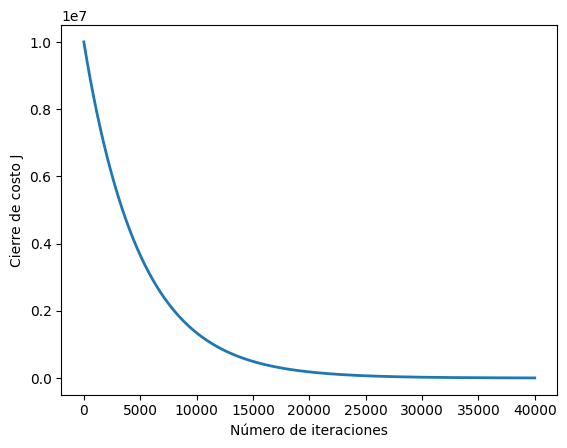

In [42]:
theta = np.zeros(18)

num_iter = 40000
alpha = 0.0001

theta, J_history = calcularDescensoGradiente(X_ready, y_train, theta, alpha, num_iter)
print(f"Los valores de theta calculados son: { theta }")
print("*" * 100)
print(f"Con un Cierre de Precio: { J_history[-1] }")

# Grafica de la convergencia del Cierre de Precio
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel("Número de iteraciones")
plt.ylabel("Cierre de costo J")

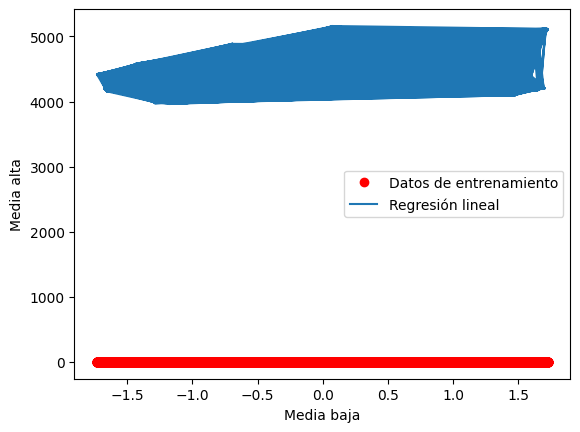

In [43]:
# Haciendo pruebas
graficarDatos(X_ready[:, 1], X_ready[:, 17], xlabel1, xlabel2)

plt.plot(X_ready[:, 1], np.dot(X_ready, theta), '-')

plt.legend(['Datos de entrenamiento', 'Regresión lineal'])

In [146]:
# Probamos algunas predicciones
p_array = np.dot([1, 9226,	4754,	4757,	4752,	4927,	234267435,	1881,	4747,	4733,	4746,	4743,	1,	1,	1,	4,	3,	4757], theta)
print(p_array)

4754.418122768556


In [44]:
# Haciendo pruebas con valores
y_pred = np.dot([1, 0.455315, -0.764987,	-0.763564,	-0.765791,	0.184857,	0.095274,	0.150829,	-0.767157,	-0.765891,
                 -0.766444,	-0.767717,	0.114549,	-0.080046,	0.010156,	-0.042671,	-0.057833,	-0.753722], theta)

print(y_pred)

4122.599453863182


In [45]:
# Haciendo otras pruebas con diferentes valores
y_pred = np.dot([1, 1.731871,	2.189766,	2.181249,	2.196505,	-1.007530,	-0.992132,	-0.935309,	2.189193,	2.197494,	2.183491,
                 2.198422,	0.114549,	-0.080046,	0.010156,	-0.042671,	-0.057833,	2.186342], theta)

print(y_pred)

5112.275182245954


Viendo los resultados vemos que se aproximan los calculos de precios en ambos predicciones.

## 2.2.1 Prueba 

In [116]:
# Aplicamos con el data de X_test que es el 20$% para la prueba
# Normalizamos el X_test
X_test_norm = (X_test - mu) / sigma
m_test = len(X_test)

# Mostramos el X_test_norm
X_test_norm

,date,open_price,maximim_value,minimum_value,volume,financial,negotiations,mme13,mme72,high_mean,low_mean,diffMACD,deaMACD,MACDlh,difflh,dealh,target
2647,1.330778,-0.616866,-0.615800,-0.614308,-0.785700,-0.794706,-0.788155,-0.613015,-0.605418,-0.612628,-0.613214,-0.394687,-0.669474,0.012137,-0.040819,-0.056893,-0.608756
20031,0.284442,-0.209476,-0.212347,-0.208860,-0.332059,-0.350771,-0.455829,-0.208377,-0.202785,-0.211849,-0.207653,0.113918,-0.079524,0.012137,-0.040819,-0.056893,-0.207707
24378,-1.314587,0.557725,0.558960,0.563280,-0.725362,-0.710313,-0.644799,0.562221,0.554761,0.562989,0.561721,0.876826,0.805402,0.012137,-0.040819,-0.056893,0.558742
11420,1.361349,-0.735812,-0.737429,-0.739520,0.394208,0.291134,0.292446,-0.737977,-0.751559,-0.737314,-0.738461,1.131129,1.100377,0.012137,0.507203,0.526862,-0.742439
5377,-0.619507,-0.940994,-0.948056,-0.945225,-0.188939,-0.259759,-0.393926,-0.946247,-0.951384,-0.945125,-0.944223,0.622524,0.805402,0.012137,-0.040819,-0.056893,-0.947420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26010,-0.777599,0.736144,0.736954,0.742155,-0.523008,-0.497396,-0.515561,0.740738,0.730727,0.744082,0.746609,0.113918,-0.079524,-0.916134,-0.040819,-0.056893,0.742928
16687,-0.745143,-0.381948,-0.378475,-0.378790,-0.453839,-0.475175,-0.474292,-0.374993,-0.369803,-0.375129,-0.374648,-0.140384,-0.079524,0.012137,-0.040819,-0.056893,-0.377039
14931,-1.270196,-0.477104,-0.479338,-0.480152,-0.109469,-0.155396,-0.291839,-0.491029,-0.509979,-0.496847,-0.496913,1.385432,0.510427,1.868681,1.603248,1.110616,-0.469132
7563,-0.165229,-0.813127,-0.814560,-0.822995,1.253294,1.069853,0.726858,-0.821285,-0.823138,-0.820439,-0.821959,0.113918,-0.079524,0.012137,-0.040819,-0.056893,-0.831561


In [117]:
# Concatenamos con la columna de ceros
X_test_ready = np.concatenate([X_test_norm, np.zeros((m_test, 1))], axis = 1)
# Mostramos los resultados
print(X_test_ready)

[[ 1.33077772 -0.6168659  -0.61580022 ... -0.05689303 -0.60875627
   0.        ]
 [ 0.28444166 -0.2094761  -0.21234717 ... -0.05689303 -0.2077072
   0.        ]
 [-1.3145868   0.55772512  0.55896012 ... -0.05689303  0.55874214
   0.        ]
 ...
 [-1.27019552 -0.47710444 -0.47933816 ...  1.11061639 -0.46913178
   0.        ]
 [-0.16522947 -0.81312668 -0.81456018 ... -0.05689303 -0.83156131
   0.        ]
 [-1.66573861 -0.57226118 -0.57130172 ... -0.05689303 -0.5939026
   0.        ]]


Realizamos los calculos de los Y predichas utilizando el modelo de regresion lineal entrenado: 
con los datos de prueba del 20%

In [118]:
# inicializamos nuestra y_predicha donde almacenaremos nuestras y predichas
y_predicha = []

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_ready:
  y_predicha.append(np.dot(i, theta))

# Convertimos la lista de y_predichas a un array unidimensional
y_predicha = np.array(y_predicha)
# Convertimos los datos de prediccion a un Dataframe
df_pred = pd.DataFrame(y_predicha, columns = ['y_predicha'])
df_pred['y_predicha'] = df_pred['y_predicha'].abs()

In [120]:
X_columans = ['date','open_price','maximim_value','minimum_value','volume','financial','negotiations','mme13','mme72','high_mean','low_mean','diffMACD','deaMACD','MACDlh','difflh','dealh','target']
X_test = np.array(X_test)
X_test = pd.DataFrame(X_test, columns = X_columans)

y_test = np.array(y_test)
y_test = pd.DataFrame(y_test, columns = ['close_price'])

# Para mostrar una tabla donde se muestren todos los resultados en uno solo de X_test_ready, y_test y y_predicha
# Mostramos los resultados en una sola tabla
df_resultado = pd.concat([X_test, y_test, df_pred], axis = 1)
df_resultado.head(20)


,date,open_price,maximim_value,minimum_value,volume,financial,negotiations,mme13,mme72,high_mean,low_mean,diffMACD,deaMACD,MACDlh,difflh,dealh,target,close_price,y_predicha
0,29270,4253,4254,4253,720,30626535,172,4254,4256,4255,4253,-2,-2,0,0,0,4256,4253,5649.606807
1,19276,4390,4390,4389,1953,85731310,478,4390,4391,4390,4389,0,0,0,0,0,4391,4389,1192.956071
2,4003,4648,4650,4648,884,41102050,304,4649,4645,4651,4647,3,3,0,0,0,4649,4649,5626.688753
3,29562,4213,4213,4211,3927,165409670,1167,4212,4207,4213,4211,4,4,0,1,1,4211,4212,5864.939365
4,10642,4144,4142,4142,2342,97028400,535,4142,4140,4143,4142,2,3,0,0,0,4142,4143,2897.641909
5,11839,4785,4786,4783,1097,52489400,594,4787,4783,4789,4786,0,0,0,0,0,4808,4785,1975.136241
6,6896,4085,4085,4085,762,31128610,183,4084,4080,4085,4084,4,3,0,1,1,4082,4085,4651.510244
7,25727,4214,4215,4214,873,36796000,213,4215,4215,4216,4215,0,0,0,0,0,4219,4214,4023.397893
8,10484,4122,4120,4120,5599,230793410,1727,4119,4113,4121,4118,6,0,0,1,1,4126,4123,2895.340547
9,13012,4309,4309,4308,801,34510375,187,4309,4310,4309,4308,-1,0,0,0,0,4305,4308,1757.258038


## 2.4 Validación

Para hacer las validaciones correspondientes, primero se crea la funcion del Mean squeared error

Siguiendo el consejo de 80/20, donde 80% es para la fase de entrenamiento, y 20% es para la fase de prueba.

In [122]:
# Creamos la function del error cuadratico medio
def mean_squared_error(y_pred, y_actual):
    resta = y_pred - y_actual
    err_cuadrado = np.sum(resta**2)
    return err_cuadrado / len(y_pred)

Realizamos el calculo del errorcuadratico medio

In [130]:
# Probando con el X_test que es el 20% de prueba
#haciendo x_test que es el 20% restante
m_ready = len(y_test)

#normalizamos los datos
X_test_normalizado = (X_test - mu) / sigma

#Concatenamos de unos a la primera posicion del X_test
X_ready_test = np.concatenate([np.ones((m_ready, 1)), X_test_normalizado], axis=1)

# creamos un array que almacenara cada una de las y_predicha
y_predicha = []
for i in X_ready_test:
    y_predicha.append(np.dot(i, theta))

mse = mean_squared_error(y_predicha, y_test.values)
#calculamos el error cuadratico medio:
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(np.sqrt(mse)))

Error Cuadrático Medio (MSE) = 1545585032.901119
Raíz del Error Cuadrático Medio (RMSE) = 39313.92924780121


# 2.3 Ecuacion de la **Normal**

In [147]:
#Declaramos la funcion de la ecuacion normal para calcular thetas
def calcularThetaEcuacionNormal(X, y):
  theta = np.zeros(X.shape[1])
  theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
  return theta


In [148]:
# Se debe agregar una columnas de unos 1 al dataset
X_rem = np.concatenate([np.ones((m, 1)), X_train], axis = 1)

In [149]:
theta_ = calcularThetaEcuacionNormal(X_rem, y_train)
print(f"Los valores de theta_ calculados son: { theta_ }")

Los valores de theta_ calculados son: [-1.84749532e-02  9.43947741e-07  2.17055463e-01  1.86199925e-01
  4.16968459e-01 -3.15552832e-05  7.61576975e-10  7.10135665e-05
  4.60394477e-01 -3.17836180e-02 -3.28033316e-02 -2.37696720e-01
  2.11306851e-03 -2.20848253e-02  1.58537405e-01  1.29626794e-02
 -2.67750583e-02  2.16758225e-02]


In [153]:
# Verificar pruebas del calculo
# Haciendo pruebas con valores
X_array = [1, 9226,	4754,	4757,	4752,	4927,	234267435,	1881,	4747,	4733,	4746,	4743,	1,	1,	1,	4,	3,	4757]


price = np.dot(X_array, theta_)

print("date: 20879\n, open_price: 4206\n, maximim_value: 4206\n, minimum_value: 4205\n, volume: 4451\n, financial: 18720019\n, negotiations: 1175\n, mme13: 4202\n, mme72: 4202\n, high_mean: 4202\n, low_mean: 4201\n, diffMACD: 0\n, deaMACD: 0\n, MACDlh: 0\n, difflh: 0\n, dealh: 0\n, target: 4201")
print('Precio predecido para un "Cierre de costo" con cada una de sus caracteristicas, usando la Ecuación Normal es: ${:.2f}'.format(price))

date: 20879
, open_price: 4206
, maximim_value: 4206
, minimum_value: 4205
, volume: 4451
, financial: 18720019
, negotiations: 1175
, mme13: 4202
, mme72: 4202
, high_mean: 4202
, low_mean: 4201
, diffMACD: 0
, deaMACD: 0
, MACDlh: 0
, difflh: 0
, dealh: 0
, target: 4201
Precio predecido para un "Cierre de costo" con cada una de sus caracteristicas, usando la Ecuación Normal es: $4754.42


# **Regresión Polinomial**

Se implementa la regresión polinomial para predecir el Cierre de costo de un cierto tiempo que pasa, esto en dólares donde se calcula el precio como objetivo.

In [6]:
#Importamos las librerias para el procesamiento de datos
import numpy as np
import os
from matplotlib import pyplot as plt
import pandas as pd
import shutil as sh
from sklearn.model_selection import train_test_split


#importando libreria pandas alias pd
import pandas as pd
#labelEncoder sirve para convertir datos categoricos a numericos para poder hacer mejores calculos
from sklearn.preprocessing import LabelEncoder
#datatime sirve para poder trabajar con fechas
from datetime import datetime


from sklearn.preprocessing import PolynomialFeatures as Poly

# Preparación de los **datos** *

In [2]:
# Cargar datos
data_pol = pd.read_csv('./database_15min_procesado.csv', delimiter=',')

# Mostramos los datos 
data_pol

,date,open_price,maximim_value,minimum_value,volume,financial,negotiations,mme13,mme72,high_mean,low_mean,diffMACD,deaMACD,MACDlh,difflh,dealh,target,close_price
0,20879,4206,4206,4204,5024,211292030,1443,4201,4202,4202,4201,0,0,0,0,0,4200,4206
1,20880,4206,4206,4205,4451,187200190,1175,4202,4202,4202,4201,0,0,0,0,0,4201,4205
2,20881,4205,4206,4203,6515,273933345,1627,4202,4202,4203,4201,0,0,0,0,0,4199,4204
3,20882,4204,4204,4203,2751,115640535,801,4202,4202,4203,4201,0,0,0,0,0,4201,4203
4,20883,4203,4204,4202,3360,141218695,1038,4202,4202,4203,4201,0,0,0,0,0,4207,4202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33073,33066,5197,5197,5196,63,3274000,24,5196,5196,5196,5195,0,0,0,0,0,5197,5197
33074,33067,5196,5197,5196,76,3949415,27,5196,5196,5196,5195,0,0,0,0,0,5197,5197
33075,33068,5197,5198,5197,108,5613470,43,5196,5196,5197,5195,0,0,0,0,0,5198,5198
33076,33069,5197,5198,5197,84,4365980,28,5196,5196,5197,5195,0,0,0,0,0,5197,5197


In [17]:
# Dividimos el dataset tanto para el entrenamiento de 80% y la parte de prueba de 20%
train_data, test_data = train_test_split(data_pol, test_size = 0.2, random_state = 42)

# Dividimos los datos para X_test y y_test donde seran los datos para el prueba
X_poli_test = test_data.drop(['close_price'], axis = 1)
y_poli_test = test_data['close_price']

#Indicamos de que grado sera nuestro polinomio, en este caso de segundo grado
poly = Poly(degree=2)


# Dividimos los datos para X_train y y_train donde seran los datos para el entrenamiento
X_poli_train = poly.fit_transform(train_data.drop(['close_price'], axis = 1))
X_train = train_data.drop(['close_price'], axis = 1)
y_poli_train = train_data['close_price']
m_poli = len(y_poli_train)

print(len(X_poli_train[1]))

# Mostramos la cantidad de ejemplos que tienen X_train y y_train
print('-' * 80)
print("El 80% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(train_data)))
print("El 20% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(test_data)))

171
--------------------------------------------------------------------------------
El 80% de ejemplos que seran para el entrenamiento son: 26462
El 20% de ejemplos que seran para el entrenamiento son: 6616


## **2.1 Normalización de Características**
Viendo los datos da cada caracteristicas se observa que tienen diferentes magnitudes por lo cual normalizamos los datos de cada columna para que tengan valores similares y que el descenso gradiende pueda converger mas rápido.

In [19]:
def plotData(x, y):
  # Grafica los puntos x e y en una figura nueva
  fig = plt.figure() # abre una nueva figura

  plt.plot(x, y, 'ro', ms=10, mec='k')
  plt.xlabel('Información por minutos')
  plt.ylabel('Precios de las acciones')

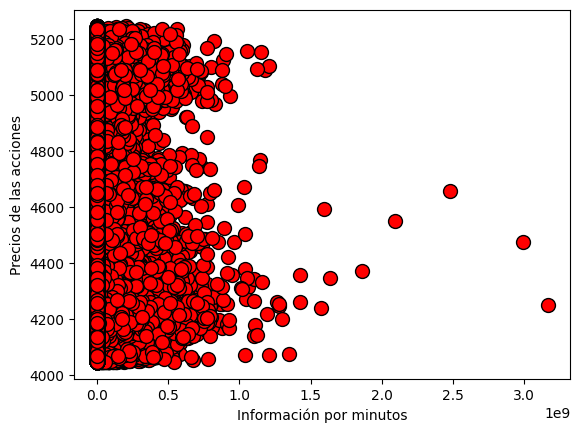

In [20]:
plotData(X_train, y_poli_train)

### Normalizamos los datos de X_poli_train

In [21]:
def featureNormalize(X):
  X_norm = X.copy()
  mu = np.zeros(X.shape[1]) # 34, promedio, media
  sigma = np.zeros(X.shape[1])  # desviasión estandar

  mu = np.mean(X, axis=0)
  sigma = np.std(X, axis=0)
  X_norm = (X - mu) / sigma

  return X_norm, mu, sigma


In [22]:
# Llamar a la funcion de normalización con los datos cargados
X_poli_norm, mu, sigma = featureNormalize(X_poli_train)

# Mostramos los datos normalizados 
X_poli_norm

C:\Users\gonza\AppData\Local\Temp\ipykernel_14248\4081456156.py:8: RuntimeWarning: invalid value encountered in divide
  X_norm = (X - mu) / sigma


array([[        nan,  0.62062188, -0.79528479, ..., -0.31094374,
        -0.05529836, -0.76825679],
       [        nan,  0.43426225, -0.22731799, ..., -0.31094374,
        -0.05529836, -0.2494864 ],
       [        nan,  1.12264123, -0.72094359, ..., -0.31094374,
        -0.05529836, -0.72499078],
       ...,
       [        nan,  1.34690096, -0.75960101, ..., -0.31094374,
        -0.05529836, -0.79252159],
       [        nan,  0.60010138, -0.81610033, ..., -0.31094374,
        -0.05529836, -0.80328923],
       [        nan, -0.95003386, -0.41168418, ..., -0.31094374,
        -0.05529836, -0.4230815 ]])

Despues de normalizar los datos de X caracteristicas la funcion es provada, y se añale el termino de interseccion X_norm

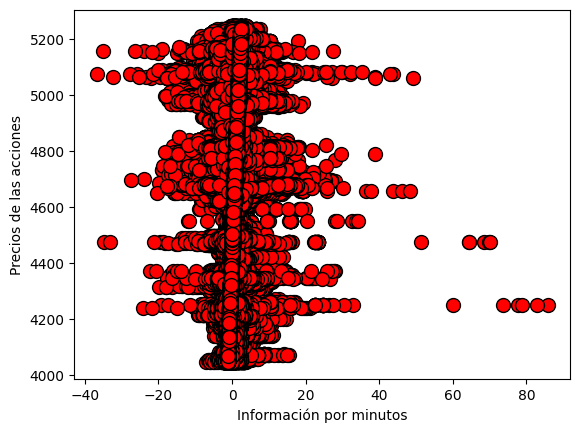

In [23]:
# Graficamos los datos ya normalizados
plotData(X_poli_norm, y_poli_train)

Visualizamos los datos y agregamos la columna de unos

In [26]:
# Añadir el termino de intersección a X
# Columna de unos para X0

X_poli_ready = np.concatenate([np.ones((m_poli, 1)), X_poli_norm], axis=1)

# Mostramos los datos 
print(X_poli_ready[:5])

[[ 1.00000000e+00             nan  6.20621879e-01 -7.95284789e-01
  -7.96760777e-01 -7.96163518e-01 -6.85994708e-01 -7.06682436e-01
  -7.66434320e-01 -7.94507521e-01 -7.93313100e-01 -7.96688739e-01
  -7.95120033e-01  1.13918246e-01 -7.95235785e-02  1.21374810e-02
  -4.08189866e-02 -5.68930314e-02 -7.81058837e-01  4.29978054e-01
   4.57659300e-01  4.57088352e-01  4.57817594e-01 -4.23071618e-01
  -4.48978219e-01 -5.44493186e-01  4.57848573e-01  4.58379825e-01
   4.57228690e-01  4.57996200e-01  1.00490715e-01 -7.81366011e-02
   8.91850368e-03 -4.38788450e-02 -5.60347184e-02  4.60049288e-01
  -7.81136588e-01 -7.81831060e-01 -7.81556165e-01 -7.08545592e-01
  -7.20008196e-01 -7.51896782e-01 -7.80806954e-01 -7.80374673e-01
  -7.81803270e-01 -7.81112221e-01  1.19271592e-01 -6.88974453e-02
   1.36289840e-02 -3.88716428e-02 -5.53366319e-02 -7.74821347e-01
  -7.82501614e-01 -7.82248897e-01 -7.08520609e-01 -7.19956618e-01
  -7.51748840e-01 -7.81501307e-01 -7.81072456e-01 -7.82495021e-01
  -7.81808

In [27]:
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)

Media calculada: [ 1.00000000e+00  1.65591769e+04  4.46044415e+03  4.46158011e+03
  4.45905812e+03  2.85553862e+03  1.29271761e+08  8.97720392e+02
  4.46003605e+03  4.45899237e+03  4.46136018e+03  4.45863378e+03
 -4.47963117e-01  2.69594135e-01 -1.30753533e-02  7.44841660e-02
  9.74605094e-02  4.46091781e+03  3.65436052e+08  7.42424323e+07
  7.42617769e+07  7.42193613e+07  4.72697443e+07  2.15429379e+12
  1.50460122e+07  7.42358954e+07  7.42185560e+07  7.42574879e+07
  7.42129847e+07 -7.06057713e+03  4.80837915e+03 -1.75757312e+02
  1.49974295e+03  1.80054127e+03  7.42487443e+07  2.00086511e+07
  2.00139826e+07  2.00021774e+07  1.28745193e+07  5.86398185e+11
  4.12843240e+06  2.00067579e+07  2.00017775e+07  2.00129043e+07
  2.00002377e+07 -2.20687072e+03  1.10027719e+03 -7.09560124e+01
  3.40780667e+02  4.56101164e+02  2.00108062e+07  2.00193268e+07
  2.00075078e+07  1.28790805e+07  5.86614126e+11  4.13015209e+06
  2.00120894e+07  2.00071062e+07  2.00182381e+07  2.00055662e+07
 -2.2082

## 2.2 Descenso por el Gradiente

In [28]:
# Declaramos la funcion de costo

def computeCostMulti(X, y, theta):
  # Inicializamos el número de ejemplos de entrenamiento
  m = y.shape[0]

  J = 0
  h = np.dot(X, theta)

  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

  return J

### 2.2.1 Calculo del Costo J(0)

:Ejemplo de funcionamiento de la funcion **calcularCosto** con dos valores diferentes de $\theta$.

In [29]:
# Generar un vector aleatorio entre 0 y 1 con longitud 171
theta_poli = np.random.rand(len(X_poli_ready[1]))
theta_poli2 = np.random.rand(len(X_poli_ready[1]))
print(theta_poli.shape[0])

print("=" * 120)
print(f"con theta:{ theta_poli } se obtiene un costo de: {computeCostMulti(X_poli_ready, y_poli_train, theta_poli)}")
print("=" * 120)
print(f"con theta:{ theta_poli2 } se obtiene un costo de: {computeCostMulti(X_poli_ready, y_poli_train, theta_poli2)}")

172
con theta:[0.2511229  0.40813318 0.1105659  0.59504271 0.30175312 0.06418981
 0.31207597 0.47364556 0.67797888 0.24621948 0.65768646 0.27171603
 0.08305867 0.44598388 0.24592134 0.96044618 0.3215162  0.92166765
 0.79916315 0.38009523 0.80125009 0.52269348 0.16141861 0.73733635
 0.99987984 0.26177079 0.51193769 0.37487483 0.10892533 0.48455993
 0.03340528 0.05699945 0.44892585 0.34096147 0.96148036 0.18082089
 0.27287846 0.97996716 0.54392451 0.17723652 0.02718099 0.54617269
 0.77097738 0.75086886 0.48200052 0.89408254 0.58362238 0.27800543
 0.25043286 0.60382729 0.22403067 0.31398289 0.69307129 0.68585478
 0.98841479 0.8389355  0.49422241 0.78318286 0.37527655 0.46568118
 0.60939738 0.15237571 0.01347377 0.11869262 0.04814226 0.97251532
 0.05546936 0.44890114 0.41543545 0.78608019 0.12466494 0.06511094
 0.41697088 0.19401082 0.08216297 0.04754784 0.00417118 0.02321388
 0.90576046 0.02780018 0.35240914 0.21356616 0.09136018 0.90354945
 0.43659437 0.45145324 0.95303364 0.78067169 0.1

## 2.3 Descenso por el Gradiente

El costo  J(θ)  esta parametrizado por el vector  θ , no  X  y  y . Donde hay que minimizar el valor de  J(θ)  cambiando los valores del vector  θ . Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de  J(θ)  y verificar si estos decrecen en cada paso.

In [30]:
# Declaramos la función el descenso por el gradiente
def gradientDescentMulti(X, y, theta, alpha, num_iter):

  m = y.shape[0]
  theta = theta.copy()
  J_history = [] # historial de costo

  for i in range(num_iter):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_history.append(computeCostMulti(X, y, theta))

  return theta, J_history


### 2.3.1 Seleccionando coheficientes de aprendizaje

theta calculado por el descenso por el gradiente: [ 4.37867233e+03  1.64959267e-01  4.19781513e+01  4.19622584e+01
  4.20269285e+01 -4.03108073e+00 -5.05666949e-01  5.12209297e+00
  4.18759773e+01  4.17403526e+01  4.18190165e+01  4.18502568e+01
 -4.59731600e-01  6.82145947e-01  1.28130211e+00  1.24433770e+00
  6.90133060e-01  4.18045376e+01]
El precio de las acciones de la moneda dólar (usando el descenso por el gradiente): $5818


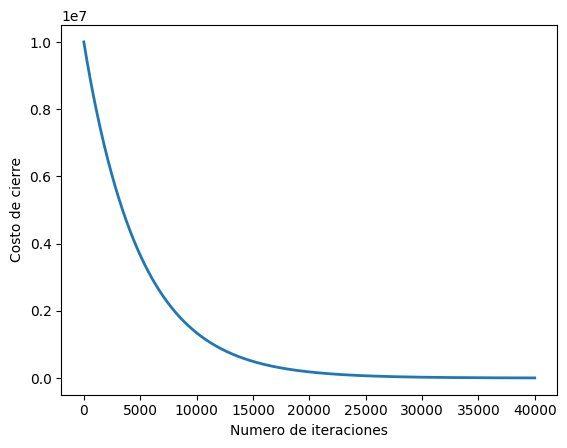

In [ ]:
# Elejimos algun valor para alpha (provar varias alternativas)
alpha = 0.0001
num_iter = 40000

# Inicializar theta y ejecuta el descenso el gradiente
theta = np.zeros(18)
theta, J_history = gradientDescentMulti(X_poli_ready, y_poli_train, theta, alpha, num_iter)

# Graficar la convergencia de la prediccion a aplicar
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo de cierre')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# El precio de las acciones con los siguientes valores
# X_array = [1, 20882,	4205,	4206,	4203,	6515,	27393334,	1627,	4202,	4202,	4203,	4201,	0, 0,	0, 0, 0, 4199, 4204]

X_array = [1, 20879,	4206,	4206, 4205,	4451,	18720019,	1175,	4202,	4202,	4202,	4201,	0,	0,	0,	0,	4201,	4205]

# X_array = np.dot([1, 1.731871,	2.189766,	2.181249,	2.196505,	-1.007530,	-0.992132,	-0.935309,	2.189193,	2.197494,	2.183491,
#                  2.198422,	0.114549,	-0.080046,	0.010156,	-0.042671,	-0.057833,	2.186342], theta)

X_array[1:18] = (X_array[1:18] - mu) / sigma
price = np.dot(X_array, theta)

print('El precio de las acciones de la moneda dólar (usando el descenso por el gradiente): ${:.0f}'.format(price))

In [ ]:
print('Shape of X_array:', len(X_array))
print('Shape of theta[:17]:', theta.shape)

Shape of X_array: 18
Shape of theta[:17]: (18,)


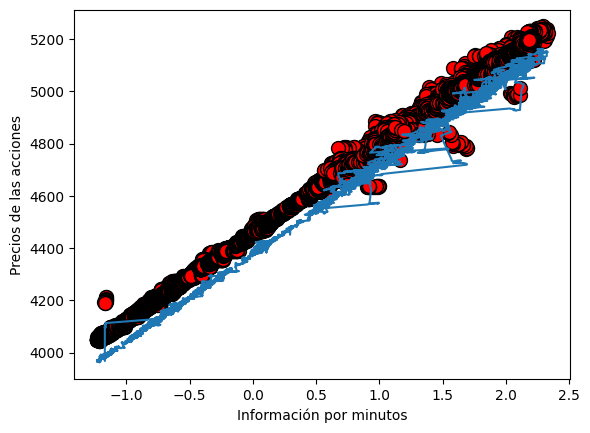

In [ ]:
plotData(X[:, 17], y)
plt.plot(X[:, 17], np.dot(X, theta), '-')

In [ ]:
# Haciendo algunas predicciones
X_array = [1, 33065, 5197, 5197, 5196, 63, 327400, 24, 5196, 5196, 5196, 5195, 0, 0, 0, 0, 5197, 5197]
X_array[1:18] = (X_array[1:18] - mu) / sigma

X_array[1:18]
print(np.dot(X_array, theta))

7209.755388338124


In [ ]:
# X_array = [1, 33065, 5197, 5197, 5196, 63, 327400, 24, 5196, 5196, 5196, 5195, 0, 0, 0, 0, 5197, 5197]

X_array = [1, 20879,	4206,	4206, 4205,	4451,	18720019,	1175,	4202,	4202,	4202,	4201,	0,	0,	0,	0,	4201,	4205]
X_array[1:18] = (X_array[1:18] - mu) / sigma

In [ ]:
X_array[1:18]
print(np.dot(X_array, theta))

5818.229717563337


Como resultado de la prediccion con los datos de X  se produjo un Costo 5818.95

# **2.3 Ecuación de la Normal**

La ecuación de la normal se aplica para que la convergencia sea mas rapido en el calculo de la regresión.

In [ ]:
# Cargar datos
data_f = pd.read_csv('/content/gdrive/MyDrive/SIS420-IA/Material/Datasets/database_15min.csv', delimiter=',')

In [ ]:
# Realizamos algunos ajustes en el Dataset

#Movimiento de columna al final del dataset y verificacion de datos
# En este caso movemos nuestra Y predicha al final de las columnas que en este caso es "4206.0.1"
indice_columna = data_f.columns.get_loc('4206.0.1')
columnas = list(data_f.columns)
columnas.pop(indice_columna)
columnas.append('4206.0.1')
data_f = data_f[columnas]
# data_f.info()



#variables categoricas, donde convertimos a int64
columnas_categoricas = data_f.select_dtypes(include=['object']).columns

#Procesamiento de frases o palabras a valores numericos para su procesamiento
for columna in columnas_categoricas:
  le = LabelEncoder()
  data_f[columna] = le.fit_transform(data_f[columna])


# Mostramos los resultados del Dataset
# print(data_f)


# Convertimos a int64 a todos los valores de X
data_f = data_f.astype('int64', errors='ignore')


#Verificamos todos los datos del Dataset
print("INFORMACION")
print(data_f)
print("\nTIPOS DE DATOS")
data_f.info()
print("\nDATOS VACIOS")
print(pd.isnull(data_f).sum())

INFORMACION
       21-11-19 09:03  4206.0  4206.5  4204.5  5024  211292030.0  1443  \
0               20879    4206    4206    4205  4451    187200190  1175   
1               20880    4205    4206    4203  6515    273933345  1627   
2               20881    4204    4204    4203  2751    115640535   801   
3               20882    4203    4204    4202  3360    141218695  1038   
4               20883    4202    4203    4201  2545    106941715   900   
...               ...     ...     ...     ...   ...          ...   ...   
33072           33065    5197    5197    5196    63      3274000    24   
33073           33066    5196    5197    5196    76      3949415    27   
33074           33067    5197    5198    5197   108      5613470    43   
33075           33068    5197    5198    5197    84      4365980    28   
33076           33069    5197    5197    5196   129      6704035    38   

       4201.6  4202.4  4202.8  4201.2  -0.637  -0.126  -0.125  -0.44  -0.377  \
0        4202    42

In [ ]:
# Separamos nuestro datos de X e Y
X = data_f.iloc[:, :17] # : todas las filas, :17 las 17 primeras columnas
y = data_f.iloc[:, 17] # : todas las filas, 17 pero solo la columna en posición 17 (18)
m = y.size

X_original = X.copy()
# X = np.concatenate([X, X * X], axis=1)
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [ ]:
X.shape

(33077, 18)

In [ ]:
# Definimos la ecuación de la normal
def ecuacionNormal(X, y):

  theta = np.zeros(X.shape[1])
  theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

  return theta

In [ ]:
# Calculamos los parámetros con la ecuación de la normal
theta = ecuacionNormal(X, y)

# Muestra los resultados obtenidos a partir de la aplicación de la ecuacióon de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)))

# Estimar los Costos de cierre o precio por acciones con los siguientes datos
X_array = [1, 20879,	4206,	4206, 4205,	4451,	18720019,	1175,	4202,	4202,	4202,	4201,	0,	0,	0,	0,	4201,	4205]
price = np.dot(X_array, theta)
print('Precio predecido para una informacion 1, 33069, 5197,	5197,	5196,	129, 6704035, 38, 5196, 5196, 5197, 5196, 0, 0, 0,	0, 0,	5197, a un Coste de cierre de: 5197 : ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [ 8.74663216e-02  7.28160952e-07  2.18100233e-01  1.76957523e-01
  4.22682927e-01 -5.35494742e-05  9.78991428e-10  1.33915279e-04
  4.52627312e-01 -2.86657436e-02 -2.65227245e-02 -2.36765566e-01
  6.66558737e-03 -2.15089118e-02  1.69650176e-01  4.32785443e-02
 -5.81567112e-02  2.15719688e-02]
Precio predecido para una informacion 1, 33069, 5197,	5197,	5196,	129, 6704035, 38, 5196, 5196, 5197, 5196, 0, 0, 0,	0, 0,	5197, a un Coste de cierre de: 5197 : $3961


In [ ]:
# Otra predicción con la ecuacion de la normal

# Calculamos los parámetros con la ecuación de la normal
theta = ecuacionNormal(X, y)

# Muestra los resultados obtenidos a partir de la aplicación de la ecuacióon de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)))

X_array = [1, 33067,	5197,	5198,	5197,	108,	5613470,	43,	5196,	5196,	5197,	5195,	0,	0,	0,	0,	0,	5198]
price = np.dot(X_array, theta)
print('Precio predecido para una informacion 1, 33069, 5197,	5197,	5196,	129, 6704035, 38, 5196, 5196, 5197, 5196, 0, 0, 0,	0, 0,	5197, a un Coste de cierre de: 5197 : ${:.0f}'.format(price))


Theta calculado a partir de la ecuación de la normal: [ 8.74663216e-02  7.28160952e-07  2.18100233e-01  1.76957523e-01
  4.22682927e-01 -5.35494742e-05  9.78991428e-10  1.33915279e-04
  4.52627312e-01 -2.86657436e-02 -2.65227245e-02 -2.36765566e-01
  6.66558737e-03 -2.15089118e-02  1.69650176e-01  4.32785443e-02
 -5.81567112e-02  2.15719688e-02]
Precio predecido para una informacion 1, 33069, 5197,	5197,	5196,	129, 6704035, 38, 5196, 5196, 5197, 5196, 0, 0, 0,	0, 0,	5197, a un Coste de cierre de: 5197 : $5197


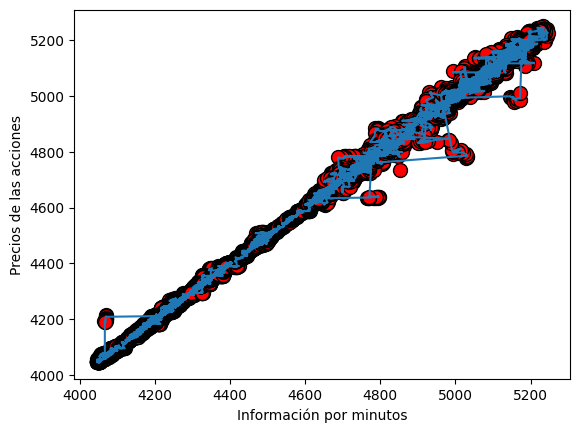

In [ ]:
# Generamos la gráfica
plotData(X[:, 17], y)
plt.plot(X[:, 17], np.dot(X, theta), '-')

En conclusión en las predicciones las mejores thetas se hallaron apartir de la ecuacion de la Noormal.